

#Ejercicio
Vamos a tomar un ejercio de datos de jugadore de Baseball de USA

y realizaremos algunos trabajos de agrupacion , trasnformacion , llenado de nulos y *duplicados*




## Pregunta 1

Cargar los datos desde el csv con el formato adecuado utilizando pandas

In [22]:
import pandas as pd

baseball = pd.read_csv('/content/data_baseball.csv', sep='\t')

In [4]:
baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Casey_Kotchman,ANA,First_Baseman,75,210,24.02,Infielder
1,Terry_Evans,ANA,Outfielder,75,200,25.11,Outfielder
2,Tommy_Murphy,ANA,Outfielder,72,185,27.51,Outfielder
3,Reggie_Willits,ANA,Outfielder,71,185,25.75,Outfielder
4,Greg_Jones,ANA,Relief_Pitcher,74,195,30.29,Pitcher


## Pregunta 2



*   chequear datos dupliucados.  

Si hay:

*   Ver cuantos son
*.   Ver que esquipo es el que tiene mas
*.   Borrar los duplicados quedandote con los ultimos como los correctos


In [15]:
#Ver cuantos duplicados son
dupli=baseball.duplicated().sum()

In [16]:
#Ver que esquipo es el que tiene mas
duplicados=baseball[baseball.duplicated()]#recortamos solo los true de duplicated
#agrupar
grupo=duplicados.groupby('Team')['Name'].count()
#ordenar
orden= grupo.sort_values(ascending=False)
#nos traemos la 1° en el orden
seleccion= orden.reset_index().iloc[0]
#nos traemos solo el nombre del equipo
equipo=seleccion['Team']
print(f'Este df tiene {dupli} duplicados, el quipo con mas duplicados es {equipo} ')

Este df tiene 30 duplicados, el quipo con mas duplicados es TB 


In [20]:
baseball[baseball.duplicated()].groupby('Team')['Name'].count().sort_values(ascending=False).reset_index().iloc[0]

Team    TB
Name     4
Name: 0, dtype: object

In [26]:
# Borrar los duplicados quedandote con los ultimos como los correctos
baseball.drop_duplicates(keep='last', inplace=True)

## Pregunta3

Chequeo de datos nulos

Si hay:

*   Determinar que columnas son en base a la libreria missigno , graficar matrix

*   DEterminar grafico heatmap de missigno si es que hay relacion
*.  Llenar los datos en base las metricas de la posicion Utilizar promedio si es variable cuantitativa
ejemplo - si es altura deberan llenar con el promedio en base a la posicion

In [23]:
!pip install missingno

<Axes: >

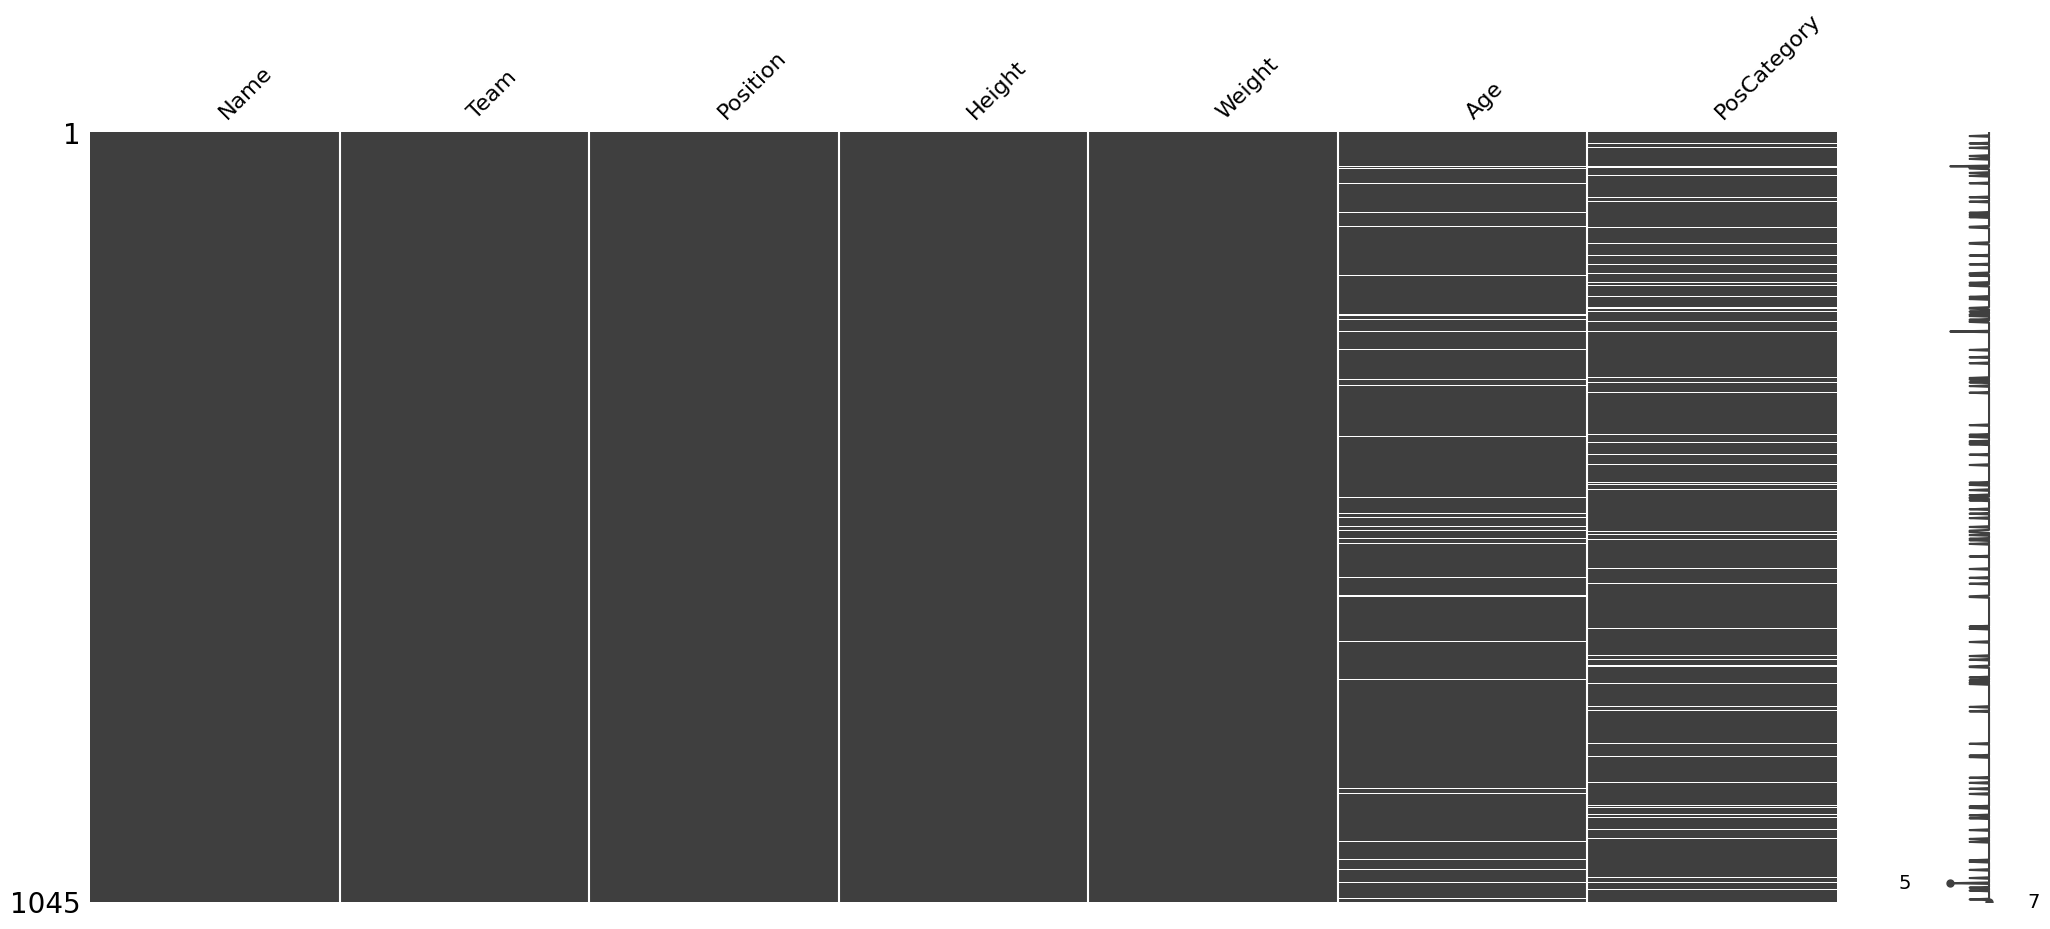

In [24]:
#Determinar que columnas son en base a la libreria missigno , graficar matrix
import missingno as msno
msno.matrix(baseball)

<Axes: >

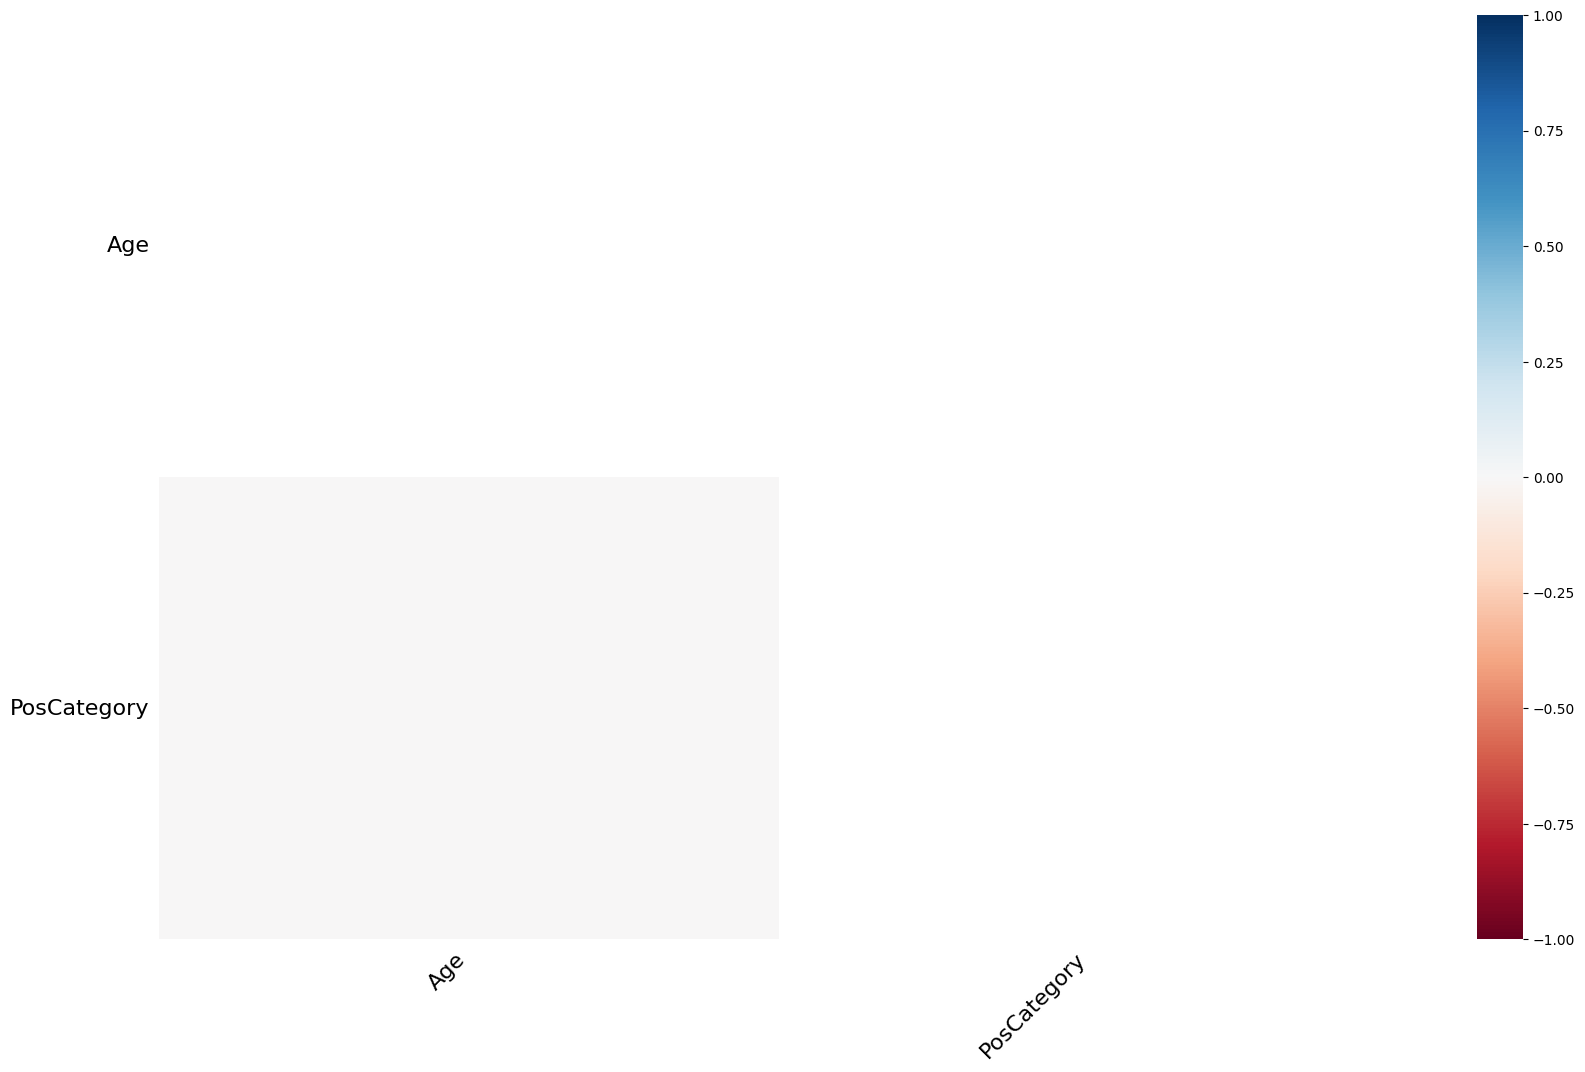

In [25]:
msno.heatmap(baseball)

In [30]:
#. Llenar los datos en base las metricas de la posicion Utilizar promedio si es variable cuantitativa ejemplo - si es altura deberan llenar con el promedio en base a la posicion
#estilo buscarv
df_group = baseball[baseball['PosCategory'].notnull()].groupby(['PosCategory', 'Position']).count().reset_index()[['PosCategory', 'Position']]
df_group.head(100)

,PosCategory,Position
0,Catcher,Catcher
1,Infielder,First_Baseman
2,Infielder,Second_Baseman
3,Infielder,Shortstop
4,Infielder,Third_Baseman
5,Outfielder,Outfielder
6,Pitcher,Relief_Pitcher
7,Pitcher,Starting_Pitcher


In [31]:
#forma para poder asignar valores de un dataframe a un valor en otra columna de otroa dataaframe
#estilo buscarv

#la idea es poder identificar cuales son todas las posiciones en el juego y ver cuales son su agrupacion

def input_group(df_group, row):
 if pd.isna(row['PosCategory']):
   a = df_group[df_group['Position'] == row['Position']]['PosCategory']
   return a.values[0]
 else:
   return row['PosCategory']

In [32]:
#. Llenar los datos en base las metricas de la posicion Utilizar promedio si es variable cuantitativa ejemplo - si es altura deberan llenar con el promedio en base a la posicion
baseball['PosCategory']=baseball.apply(lambda row: input_group(df_group, row), axis=1 )

In [33]:
baseball['Age'].fillna(value=baseball['Age'].mean(), inplace=True)

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Casey_Kotchman,ANA,First_Baseman,75,210,24,Infielder
1,Terry_Evans,ANA,Outfielder,75,200,25,Outfielder
2,Tommy_Murphy,ANA,Outfielder,72,185,28,Outfielder
3,Reggie_Willits,ANA,Outfielder,71,185,26,Outfielder
4,Greg_Jones,ANA,Relief_Pitcher,74,195,30,Pitcher


## Pregunta 4

Transformaciones:



*   Redondear la variable AGE
*   Pasar height de inches a Metros
*.  Pasar weight de libra a kilo
*   Calcular IMC de cada jugador

In [34]:
baseball['Age']=baseball['Age'].apply(lambda row: round(row))

In [36]:
baseball.columns

Index(['Name', 'Team', 'Position', 'Height', 'Weight', 'Age', 'PosCategory'], dtype='object')

In [38]:
#Pasar height de inches a Metros 1M=0.0254inch
baseball['Altura']=baseball['Height'].apply(lambda row: row*0.0254)

In [39]:
#0.453592 g--->1lb  Pasar weight de libra a kilo
baseball['Peso']=baseball['Weight']*0.453592


In [40]:
#Calcular IMC de cada jugador IMC=peso(kg)/(estatura(m))**2
baseball['IMC']= baseball['Peso']/(baseball['Altura']**2)

In [41]:
baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory,Altura,Peso,IMC
0,Casey_Kotchman,ANA,First_Baseman,75,210,24,Infielder,1.9050,95.25432,26.247910
1,Terry_Evans,ANA,Outfielder,75,200,25,Outfielder,1.9050,90.71840,24.998009
2,Tommy_Murphy,ANA,Outfielder,72,185,28,Outfielder,1.8288,83.91452,25.090233
3,Reggie_Willits,ANA,Outfielder,71,185,26,Outfielder,1.8034,83.91452,25.801977
4,Greg_Jones,ANA,Relief_Pitcher,74,195,30,Pitcher,1.8796,88.45044,25.036241


##Pregunta 5

Agrupacion

Debemos agrupar por la variable Team y calcular:



*   Cantidad de jugadores
*   promedio de IMC
*.  Max y minimo de altura


Determinar que Posicion es el que tiene el mas alto IMC y el mas bajo en promedio

In [42]:
#Debemos agrupar por la variable Team y calcular Cantidad de jugadores,promedio de IMC,Max y minimo de altura
import numpy as np
baseball.groupby('Team').agg({'Name': len,#cant jugadores
    'IMC': np.mean,#promedio IMC
    'Altura': [max, min]})#min/max altura

Name        IMC  Altura        
      len       mean     max     min
Team                                
ANA    35  26.255173  2.0066  1.7272
ARZ    28  26.946112  2.0828  1.7780
ATL    37  25.727863  2.0320  1.7780
BAL    34  25.550938  2.0066  1.7526
BOS    35  26.075656  2.0320  1.7526
CHC    36  26.105558  2.0066  1.7526
CIN    35  26.383158  2.0066  1.7526
CLE    34  25.668449  2.0066  1.7780
COL    34  25.422670  2.0320  1.7526
CWS    31  26.528052  2.0574  1.7526
DET    36  26.414082  1.9812  1.7526
FLA    32  25.999878  2.0066  1.7780
HOU    34  26.120418  1.9558  1.7780
KC     34  25.361998  2.0320  1.7526
LA     33  26.653711  2.0574  1.7272
MIN    31  26.312348  1.9304  1.7526
MLW    35  26.664501  1.9812  1.7780
NYM    38  26.071135  2.0066  1.7526
NYY    31  26.388678  2.0066  1.7780
OAK    36  25.869881  1.9558  1.7780
PHI    35  25.273780  2.0066  1.7272
PIT    35  26.491076  1.9558  1.7780
SD     32  26.550037  2.0828  1.7272
SEA    34  25.785308  2.0320  1.7526
SF     34  26.351746  1.9812  1.7272
STL    32  26.151032  2.0066  1.7018
TB     32  25.534365  1.9812  1.7780
TEX    34  25.851493  2.0066  1.8034
TOR    32  26.010873  2.0066  1.7780
WAS    36  25.476080  2.1082  1.7780

<Axes: xlabel='Position'>

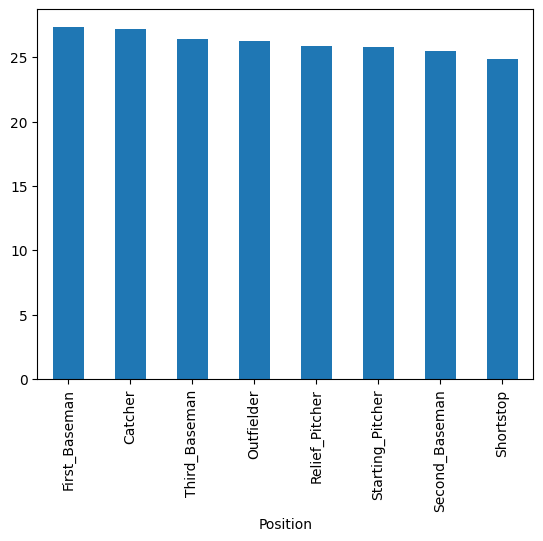

In [43]:
#Determinar que Position es el que tiene el mas alto IMC y el mas bajo en promedio
baseball.groupby('Position')['IMC'].mean().sort_values(ascending=False).plot(kind='bar')